In [18]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pylab as pylab
import h5py
from astropy.visualization import ImageNormalize, AsinhStretch
import scienceplots

plt.style.use("science")
# A simple and useful function like Alex likes them ;)

def show(file): 
    with h5py.File(file, "r") as hdf: 
        hdf.keys()
        samples = np.array(hdf["model"])
    return samples

def flip(img):
    return img[..., ::-1]

def plot(samples, N=4): 
    fig, axs = plt.subplots(N, N, figsize = (8,  8))
    k = 0
    norm = ImageNormalize(samples.mean(axis = 0), stretch=AsinhStretch(), vmin = 0)
    for i in range(N):
        for j in range(N): 
            axs[i, j].imshow(samples[k], cmap = "magma", origin = "lower", norm = norm)
            axs[i, j].axis("off")
            k += 1




In [5]:
from glob import glob

In [12]:
path = "/home/noedia/projects/rrg-lplevass/noedia/htlup2/"

skirt_files = glob(path + "vp_skirt_*.h5")
probes_files = glob(path + "vp_probes_*.h5")

In [13]:
skirt_files

['/home/noedia/projects/rrg-lplevass/noedia/htlup2/vp_skirt_8.h5',
 '/home/noedia/projects/rrg-lplevass/noedia/htlup2/vp_skirt_2.h5',
 '/home/noedia/projects/rrg-lplevass/noedia/htlup2/vp_skirt_3.h5',
 '/home/noedia/projects/rrg-lplevass/noedia/htlup2/vp_skirt_1.h5',
 '/home/noedia/projects/rrg-lplevass/noedia/htlup2/vp_skirt_4.h5',
 '/home/noedia/projects/rrg-lplevass/noedia/htlup2/vp_skirt_5.h5',
 '/home/noedia/projects/rrg-lplevass/noedia/htlup2/vp_skirt_7.h5',
 '/home/noedia/projects/rrg-lplevass/noedia/htlup2/vp_skirt_6.h5']

In [11]:
path + "vp_skirt_*.h5"

'/home/noedia/projects/rrg-lplevass/htlup2/vp_skirt_*.h5'

In [23]:
htlup_skirt = np.empty(shape =[len(skirt_files) * 40, 256, 256])
htlup_probes = np.empty(shape =[len(skirt_files) * 40, 256, 256])

for i in range(len(skirt_files)): 
    htlup_skirt[40 * i : 40 * (i+1)] = flip(show(skirt_files[i])).squeeze()
    htlup_probes[40 * i : 40 * (i+1)] = flip(show(probes_files[i])).squeeze()
    

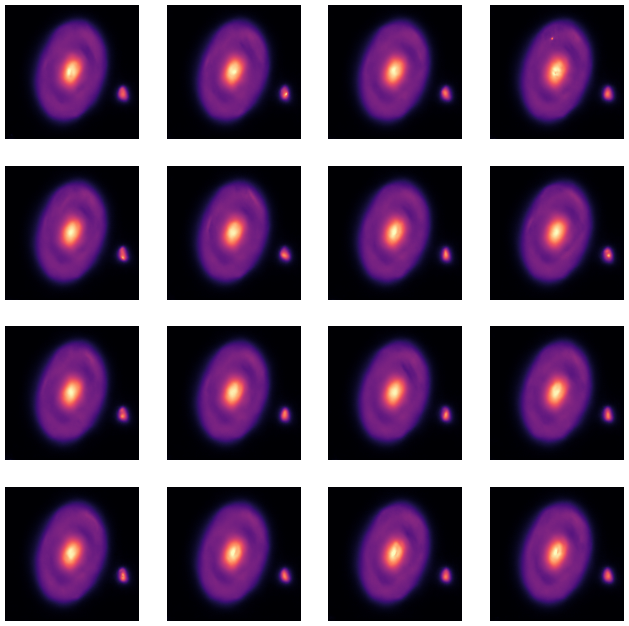

In [24]:
plot(htlup_skirt)

In [ ]:


# #path_hd16 = "C:/Users/noedi/Desktop/DSHARP_samples/hd163296/euler/vp_skirt_1.h5"

# htlup_skirt = flip(show(skirt).squeeze())[:20]
# htlup_probes = flip(show(probes).squeeze())[:20]

In [25]:
def iqr(x):
    return np.quantile(x, 0.84, axis = 0) - np.quantile(x, 0.16, axis = 0)

def median(x):
    return np.quantile(x, 0.5, axis = 0)

iqr_probes = iqr(htlup_probes)
iqr_skirt = iqr(htlup_probes)

median_probes = median(htlup_probes)
median_skirt = median(htlup_skirt)

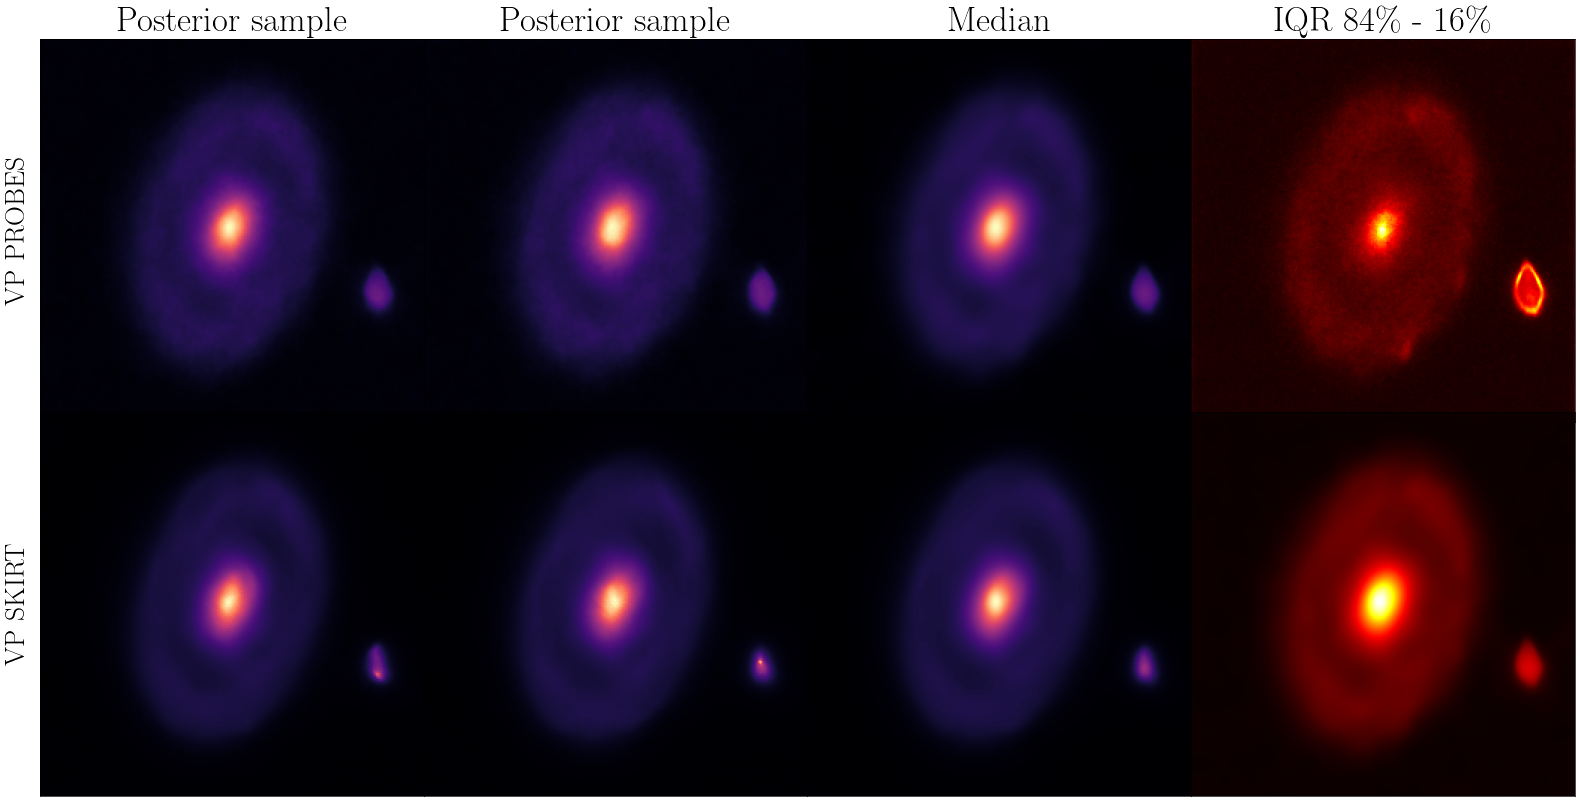

In [34]:

params = {
         'axes.labelsize': 20,
         'axes.titlesize': 25,
         'ytick.labelsize' :20,
         'xtick.labelsize' :20,
         'xtick.major.size': 8,
         'xtick.minor.size': 4,
         'xtick.major.width': 1,
         'xtick.minor.width': 1,
         'ytick.color': "k",
         'xtick.color': "k",
         'axes.labelcolor': "k",
         'ytick.labelcolor' : "k",
         'xtick.labelcolor' : "k",
         }
pylab.rcParams.update(params)

n_rows = 2
n_cols = 4
fig, axs = plt.subplots(n_rows, n_cols, figsize = (16, 8.2))


# Create some sample images (you can replace these with your own images)

# Posterior samples probes
image1 = htlup_probes[1]
image2 = htlup_probes[2]


# Posterior samples skirt
image5 = htlup_skirt[4]
image6 = htlup_skirt[16]


# Median and IQR probes
image3 = median_probes
image4 = iqr_probes

# Median skirt
image7 = median_skirt
image8 = median_probes


# GRF ALEX
image9 = np.random.rand(256, 256)
image10 = np.random.rand(256, 256)
image11 = np.random.rand(256, 256)
image12 = np.random.rand(256, 256)


cmap = "magma"
cmap_res = "hot"


# Target 1
axs[0, 0].imshow(image1, cmap = cmap, origin = "lower")


axs[0, 1].imshow(image2, cmap= cmap, origin = "lower")


axs[0, 2].imshow(image3, cmap= cmap, origin = "lower")

axs[0, 3].imshow(image4, cmap= cmap_res, origin = "lower")



axs[0, 0].set_title('Posterior sample')  # Adjust the fontsize for the title
axs[0, 1].set_title('Posterior sample')
axs[0, 2].set_title('Median')
axs[0, 3].set_title('IQR 84\% - 16\%')

 

# CLEAN
axs[1, 0].imshow(image5, cmap=cmap, origin = "lower")

# MPOL
axs[1, 1].imshow(image6, cmap=cmap, origin = "lower")

# Posterior sample
axs[1, 2].imshow(image7, cmap=cmap, origin = "lower")

# Posterior sample
axs[1, 3].imshow(image8, cmap = cmap_res, origin = "lower")



# axs[2, 0].imshow(image6, cmap=cmap, origin = "lower")

# axs[2, 1].imshow(image7, cmap=cmap, origin = "lower")

# # Posterior sample
# axs[2, 2].imshow(image8, cmap=cmap, origin = "lower", norm = norm_hd16)

# # Posterior sample
# axs[2, 3].imshow(image9, cmap = cmap_res, origin = "lower")



for i in range(n_rows): 
    for j in range(n_cols):
        plt.setp(axs[i, j].get_xticklabels(), visible=False)
        plt.setp(axs[i, j].get_yticklabels(), visible=False)
        axs[i,j].tick_params(axis='both', which='both', length=0)

axs[0, 0].set_ylabel("VP PROBES", fontsize = 20)
axs[1, 0].set_ylabel("VP SKIRT", fontsize = 20)
# Adjust spacing between subplots
fig.tight_layout(w_pad=0., h_pad=0.) 
plt.savefig("prior_comparison.pdf")



In [ ]:
path = "../../../Desktop/"
probes = torch.load(path + "probes.pt")
skirt = torch.load(path + "skirt.pt")
samples_probes = torch.cat([probes[1], probes[2], probes[13], probes[-2]], axis = 0)
samples_skirt = torch.cat([skirt[0], skirt[2], skirt[7], skirt[11]], axis = 0)
from matplotlib.colors import LogNorm
n_rows = 2 
n_cols = 4
fig, axs = plt.subplots(n_rows, n_cols, figsize = (15.9, 8))

norm = LogNorm(vmin = 1e-1, clip = True)
norm2 = LogNorm(vmin= 1e-3, clip = True)
fig.text(0.5, 0.8, "Prior samples")
for i in range(len(samples_probes)):
    axs[0, i].imshow(samples_probes[i].cpu(), cmap = "hot", norm = norm)
    axs[1,i].imshow(samples_skirt[i].cpu(), cmap = "hot", norm = norm2)

axs[0,0].set_ylabel("PROBES", fontsize = 20)
axs[1,0].set_ylabel("SKIRT", fontsize = 20)
for i in range(n_rows): 
    for j in range(n_cols):
        plt.setp(axs[i, j].get_xticklabels(), visible=False)
        plt.setp(axs[i, j].get_yticklabels(), visible=False)
        axs[i,j].tick_params(axis='both', which='both', length=0)

fig.text(0.45, 0.9, "Prior samples", fontsize = 20)
plt.subplots_adjust(wspace = 0., hspace = 0.)

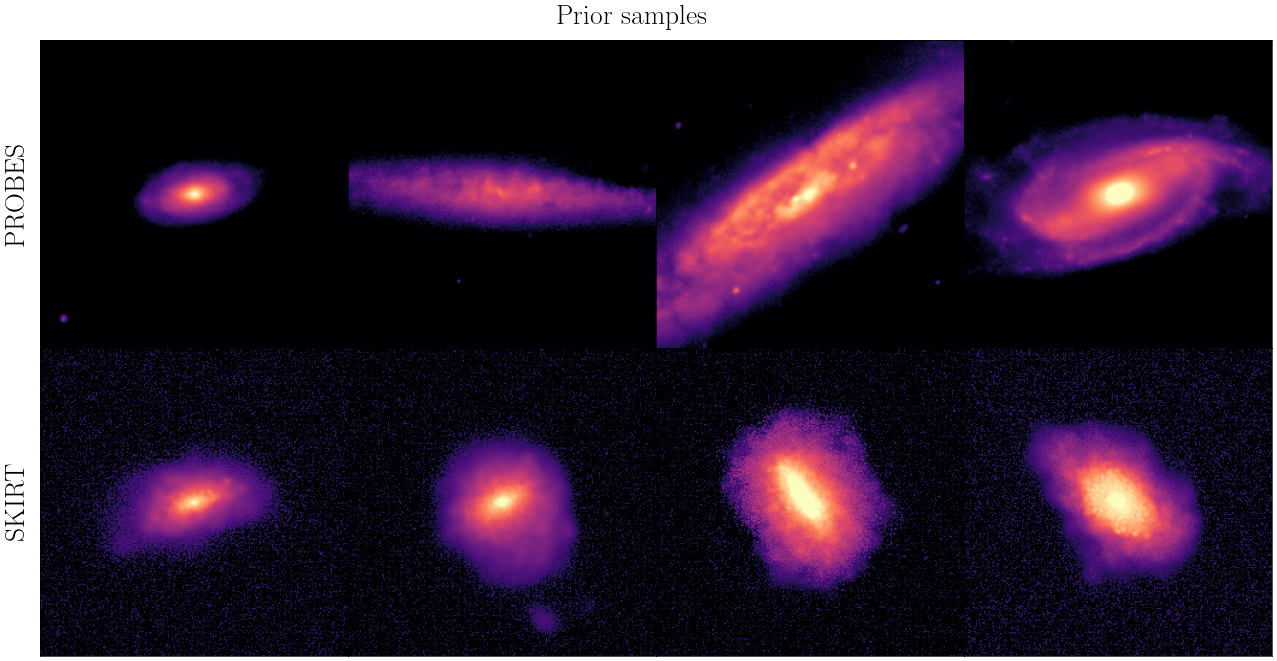

In [44]:
import torch
path = "/home/noedia/projects/rrg-lplevass/noedia/"
probes = torch.load(path + "probes.pt")
skirt = torch.load(path + "skirt.pt")
samples_probes = torch.cat([probes[1], probes[2], probes[13], probes[-2]], axis = 0)
samples_skirt = torch.cat([skirt[0], skirt[2], skirt[7], skirt[11]], axis = 0)
from matplotlib.colors import LogNorm
n_rows = 2 
n_cols = 4
fig, axs = plt.subplots(n_rows, n_cols, figsize = (15.9, 8))

norm = LogNorm(vmin = 1e-1, clip = True)
norm2 = LogNorm(vmin= 1e-3, clip = True)
fig.text(0.5, 0.8, "Prior samples", fontsize = 20)
for i in range(len(samples_probes)):
    axs[0, i].imshow(samples_probes[i].cpu(), cmap = "magma", norm = norm)
    axs[1,i].imshow(samples_skirt[i].cpu(), cmap = "magma", norm = norm2)

axs[0,0].set_ylabel("PROBES", fontsize = 20)
axs[1,0].set_ylabel("SKIRT", fontsize = 20)
for i in range(n_rows): 
    for j in range(n_cols):
        plt.setp(axs[i, j].get_xticklabels(), visible=False)
        plt.setp(axs[i, j].get_yticklabels(), visible=False)
        axs[i,j].tick_params(axis='both', which='both', length=0)

fig.text(0.45, 0.9, "Prior samples", fontsize = 20)
plt.subplots_adjust(wspace = 0., hspace = 0.)
plt.savefig("prior_samples.pdf")